## Proposal:

This project aims to explore and analyze the underlying patterns within a music acoustic information dataset with a specific focus on understanding how these patterns relate to the popularity of music tracks. The primary objectives are:

1. Dimensionality Reduction: Using PCA and T-SNE

2. Pattern Identification: To identify any significant patterns or clusters within the music tracks based on their acoustic features

3. Popularity Correlation: To investigate if there are discernible clusters or trends that correlate with the popularity of the tracks.

Dataset:

In this project, we will be using the tracks.csv dataset which contains the acoustic features information for Spotify tracks. To read more about this dataset, you can go to the data gathering section where we have a brief introduction to all the datasets and also their sources. 

Tools:

In this notebook, we will be using Python, so everything was done by Python Libraries. For the PCA and T-SNE I will be using the off-the-shelf implementations from the scikit-learn library. For the visualization, I will be using the matplotlib and seaborn libraries.

## Code Implementation

In [1]:
import numpy as np

In [2]:
from sklearn.decomposition import PCA
import pandas as pd

# load the data
df = pd.read_csv('../data/00-raw-data/tracks.csv')

df = df.sample(1000, random_state=42)
Y = df['popularity']
# drop not numeric columns
df = df.drop(['id', 'name', 'time_signature', 'artists','id_artists','release_date', 'popularity'], axis=1)


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)

In [6]:
pca = PCA()
pca.fit(df_norm)

PCA()

In [7]:
explained_variance_ratio = pca.explained_variance_ratio_

### Finding the best number of components by scree plot

In [9]:
import matplotlib.pyplot as plt

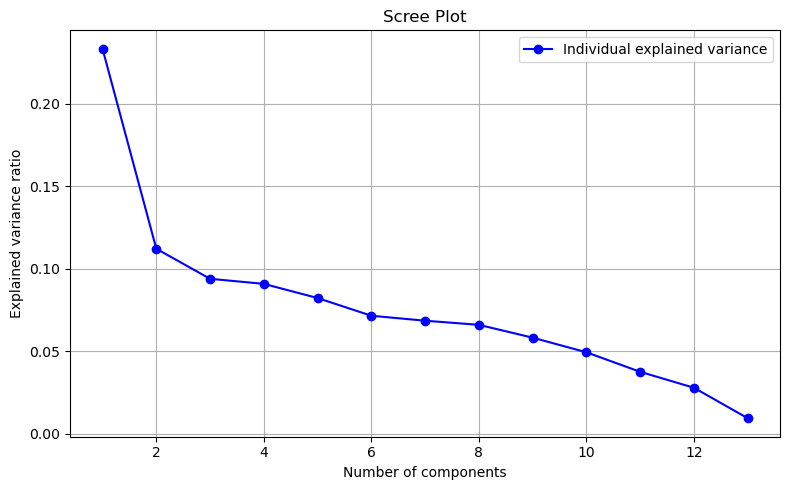

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b', label='Individual explained variance')
plt.title('Scree Plot')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.show()

From the plot, we can observe the the elbow is appear near 2, so we will choose 2 as the optimal number of components for the following PCA analysis.

In [20]:
pca_optimal = PCA(n_components=2)
principalComponents = pca_optimal.fit_transform(df_norm)

In [21]:
pca_df = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])
pca_df['popularity'] = Y.values

In [23]:
import seaborn as sns

### Plot the result of PCA with colors indicating the popularity

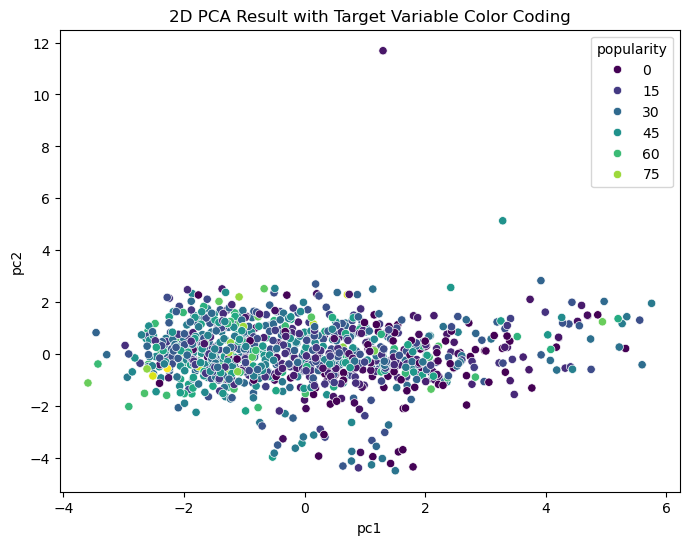

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='pc1', y='pc2', hue='popularity', palette='viridis')
plt.title('2D PCA Result with Target Variable Color Coding')
plt.show()

From this plot, we can observe that most of the data points are mixed together and there is no clear clustering pattern can be seen. Also, we can not observe clear pattern on the popularity clustering. It could be due to the fact that the data can't be linearly separated.

### T-SNE

In [26]:
from sklearn.manifold import TSNE

In [28]:
tsne = TSNE(n_components=2, random_state=0)
results = []

for i in range(5, 30):
    tsne = TSNE(n_components=2, random_state=0, perplexity=i)
    results.append(tsne.fit_transform(df_norm))     

In [31]:
tsne_df_5 = pd.DataFrame(data=results[0], columns=['tsne1', 'tsne2'])
tsne_df_5['Target'] = Y.values

### Plot the result of T-SNE with colors indicating the popularity

Perplexity = 5

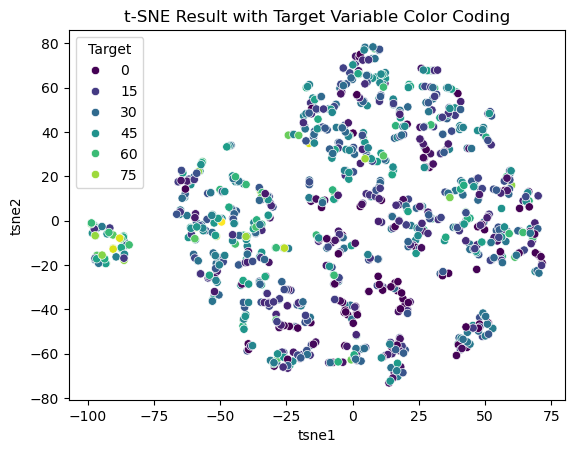

In [32]:
sns.scatterplot(data=tsne_df_5, x='tsne1', y='tsne2', hue='Target', palette='viridis')
plt.title('t-SNE Result with Target Variable Color Coding')
plt.show()

Perplexity = 15

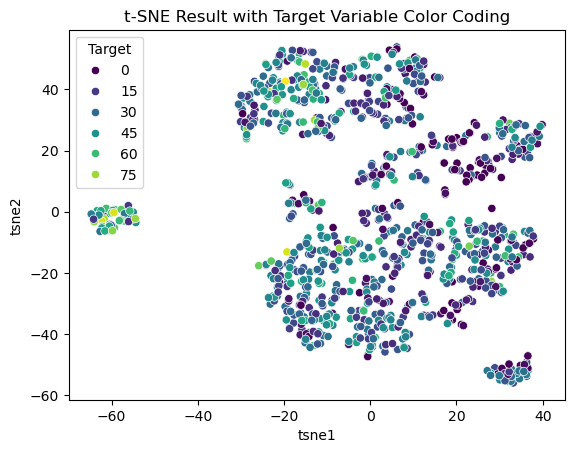

In [34]:
tsne_df_15 = pd.DataFrame(data=results[10], columns=['tsne1', 'tsne2'])
tsne_df_15['Target'] = Y.values
sns.scatterplot(data=tsne_df_15, x='tsne1', y='tsne2', hue='Target', palette='viridis')
plt.title('t-SNE Result with Target Variable Color Coding')
plt.show()

Perplexity = 30

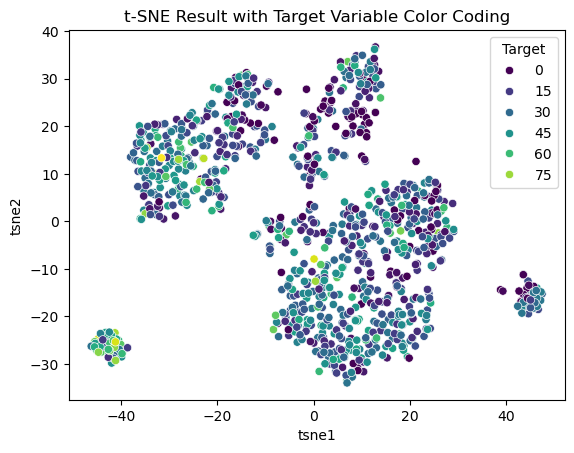

In [37]:
tsne_df_30 = pd.DataFrame(data=results[24], columns=['tsne1', 'tsne2'])
tsne_df_30['Target'] = Y.values
sns.scatterplot(data=tsne_df_30, x='tsne1', y='tsne2', hue='Target', palette='viridis')
plt.title('t-SNE Result with Target Variable Color Coding')
plt.show()

From the plot, we can observe that comapre to the PCA, T-SNE can show the clusters better. We can observe some clear clusters when the perplexity is 30. It is also noticing that as the perplexity increases the clusters becoming more and more clear. However, we can still not observe and clear clustering behavior in terms of the popularity. But the clusters shown could be useful insights as well with more background knowledge.

### Evaluation for PCA and T-SNE

For PCA, the two first components explains about 0.4 of the variance, which is not very enough to explain the data. But since the variance explained ratio goes pretty flat for the rest of the components, we can say that we preserve the most important components in the data. We can see from the plot that the PCA is more preserving the structure of the global data, but it is not able to separate the data into different clusters.

For T-SNE, as the perplexity goes up, we can see more cleary clusters in the data. But we still can't find any obvious pattern regard our target popularity from the plot. We can also see that the T-SNE is more preserving the local structure of the data, which is more suitable for clustering.

Comparing between the two methods, it depends on the purpose of the analysis. For plotting purpose, it seems T-SNE is a better option, since it can preserve the pattern and the clusters from the higher dimension better and can be plot more clearly. If we want to preserve the global structure and interested in the varianced, we shouold use PCA, sicne it result can be more easily interpreted in terms of variance and choosing the best hyper parameters is eaier. Also, PCA is more efficient than T-SNE. In this dataset, we have to do a sample of data to run the T-SNE, otherwise it will take more than 5 hours for the T-SNE to run. On the other hands, PCA can only be done within seconds.

## Report

In this project, we aimed to explore patterns within a music acoustic information dataset, focusing on how these patterns relate to the popularity of music tracks. We employed two dimensionality reduction techniques: Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE). Here is the steps taken in both methods:

#### PCA (Principal Component Analysis)
Scree Plot Analysis: We began with a scree plot to determine the optimal number of components for PCA. This plot helped us assess how much variance each principal component accounts for.

PCA Execution: Using the selected number of components, we conducted PCA to reduce the dimensionality of the dataset.

PCA Visualization: The results were visualized to examine any apparent clustering or patterns, particularly concerning track popularity.

#### t-SNE (t-Distributed Stochastic Neighbor Embedding)

Perplexity Range Testing: We experimented with a range of perplexity values in t-SNE.

t-SNE Visualization: Each perplexity setting's results were plotted to identify the most clear and meaningful pattern.


#### Insights and Analysis

PCA Findings

The scree plot indicated that a few components accounted for a significant portion of the variance.
The PCA plot, however, did not reveal distinct clustering patterns related to the popularity of the tracks. The data points appeared to be quite mixed, suggesting a more complex relationship between the features and popularity.

t-SNE Findings

Different perplexity values in t-SNE produced varying degrees of clustering behavior. While we did not observe clear clusters associated directly with popularity, some grouping was noticeable. These clusters, however, require further interpretation and understanding of the dataset for meaningful insights.

Need for Additional Data or Features

The results suggest that integrating additional data types or features could be beneficial in uncovering more distinct patterns related to popularity.
